## Pizza Place Sales Analysis

In [43]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

### Importing datasets

In [2]:
orders = pd.read_csv("C:/Users/Paul Obayomi/Documents/Python folder/Datasets/pizza_sales/orders.csv")

In [3]:
order_details = pd.read_csv("C:/Users/Paul Obayomi/Documents/Python folder/Datasets/pizza_sales/order_details.csv")

In [4]:
pizzas = pd.read_csv("C:/Users/Paul Obayomi/Documents/Python folder/Datasets/pizza_sales/pizzas.csv")

In [5]:
pizza_types = pd.read_csv("C:/Users/Paul Obayomi/Documents/Python folder/Datasets/pizza_sales/pizza_types.csv", encoding='unicode_escape')

### Having a proper glimpse at the datasets

In [6]:
# View order dataset
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [7]:
# View order details dataset
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [8]:
# View pizza dataset
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [9]:
# View pizza types dataset
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [10]:
# Orders information
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [11]:
# Order details information
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
# Pizzas information
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [13]:
# Pizza_types information
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


### Joining or Merging the Datasets

inner join is almost always preferred because we're working with actual completed transactions, we want to avoid null values.

In [14]:
# Step 1: Join orders and order_details
merged_df = pd.merge(orders, order_details, on="order_id", how="inner")

In [15]:
merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          48620 non-null  int64 
 1   date              48620 non-null  object
 2   time              48620 non-null  object
 3   order_details_id  48620 non-null  int64 
 4   pizza_id          48620 non-null  object
 5   quantity          48620 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.2+ MB


In [17]:
# Step 2: Join with pizzas
merged_df = pd.merge(merged_df, pizzas, on="pizza_id", how="inner")

In [18]:
merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00


In [19]:
# Step 3: Join with pizza_types
merged_df = pd.merge(merged_df, pizza_types, on="pizza_type_id", how="inner")

In [20]:
merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [21]:
# View the complete merged datasets
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


### Data Cleaning & Exploring

In [22]:
# Convert from object to datetime
merged_df["date"] = pd.to_datetime(merged_df["date"])

In [23]:
# Convert object to time data type
merged_df["time"] = pd.to_datetime(merged_df["time"], format="%H:%M:%S")

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  datetime64[ns]
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [25]:
merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,1900-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,1900-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,1900-01-01 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,1900-01-01 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,1900-01-01 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


- This is the expected behavior when you use pandas.to_datetime() on a time-only string (like "11:38:36").Since there's no date in the string, pandas assumes a default date of 1900-01-01, which is harmless, we can still extract hour, minute, or second — the date won't affect those operations.

In [26]:
# Check for null values
merged_df.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [27]:
# Check for duplicates
merged_df.duplicated().sum()

0

In [28]:
# Explore pizza type id
merged_df["pizza_type_id"].value_counts()

pizza_type_id
classic_dlx     2416
bbq_ckn         2372
hawaiian        2370
pepperoni       2369
thai_ckn        2315
cali_ckn        2302
sicilian        1887
spicy_ital      1887
southw_ckn      1885
four_cheese     1850
ital_supr       1849
big_meat        1811
veggie_veg      1510
mexicana        1456
napolitana      1451
spinach_fet     1432
prsc_argla      1428
peppr_salami    1422
ital_cpcllo     1414
the_greek       1406
five_cheese     1359
pep_msh_pep     1342
green_garden     987
ckn_alfredo      980
ital_veggie      975
ckn_pesto        961
spin_pesto       957
soppressata      957
spinach_supr     940
calabrese        927
mediterraneo     923
brie_carre       480
Name: count, dtype: int64

In [29]:
# Explore pizza sizes
merged_df["size"].value_counts()

size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [30]:
# Explore pizza categories
merged_df["category"].value_counts()

category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [31]:
# Create the Sales column
merged_df["sales"] = merged_df["quantity"] * merged_df["price"]

In [32]:
merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,sales
0,1,2015-01-01,1900-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2015-01-01,1900-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,2,2015-01-01,1900-01-01 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,2,2015-01-01,1900-01-01 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,2,2015-01-01,1900-01-01 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  datetime64[ns]
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  sales             48620 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


In [34]:
merged_df.to_csv("cleaned_pizza_place_sales.csv", index=False)

- save cleaned dataset.

## Data Analysis

### 1. What is the total revenue/sales?

In [35]:
# Total sales
total_sales = merged_df["sales"].sum()

print(f"Total sales: ${total_sales:.2f}")

Total sales: $817860.05


### 2.	Find the total quantity sold.

In [36]:
# Total quantity sold
total_quantity_sold = merged_df["quantity"].sum()

print(f"Total quantity sold: {total_quantity_sold: .2f}")

Total quantity sold:  49574.00


### 3.	Find the total orders.

In [37]:
# Total order
total_order = merged_df["order_id"].count()

print(f"Total order: {total_order: }")

Total order:  48620


### 4.	How many pizza types do they sell?

In [38]:
# Total pizza types they sell
pizza_type = merged_df["pizza_type_id"].value_counts()

print(f"They sell {pizza_type.count()} pizza types")

They sell 32 pizza types


### 5.	Find the average price of the pizzas?

In [39]:
# Average price of pizza
avg_price_of_pizza = merged_df["price"].mean()

print(f"The average price of pizza is: {avg_price_of_pizza:.2f}")

The average price of pizza is: 16.49


### 6.	What are the peak hours of sales?

In [40]:
# Extract hour
merged_df["hour"] = merged_df["time"].dt.hour

In [41]:
merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,sales,hour
0,1,2015-01-01,1900-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11
1,2,2015-01-01,1900-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11
2,2,2015-01-01,1900-01-01 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11
3,2,2015-01-01,1900-01-01 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11
4,2,2015-01-01,1900-01-01 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11


In [42]:
# Group by hours and sales
sales_by_hour = merged_df.groupby("hour")["sales"].sum().reset_index()

# Sort to find peak hours
peak_hours = sales_by_hour.sort_values(by="sales", ascending=False)

print(peak_hours)

    hour      sales
3     12  111877.90
4     13  106065.70
9     18   89296.85
8     17   86237.45
10    19   72628.90
7     16   70055.40
5     14   59201.40
11    20   58215.40
6     15   52992.30
2     11   44935.80
12    21   42029.80
13    22   22815.15
14    23    1121.35
1     10     303.65
0      9      83.00


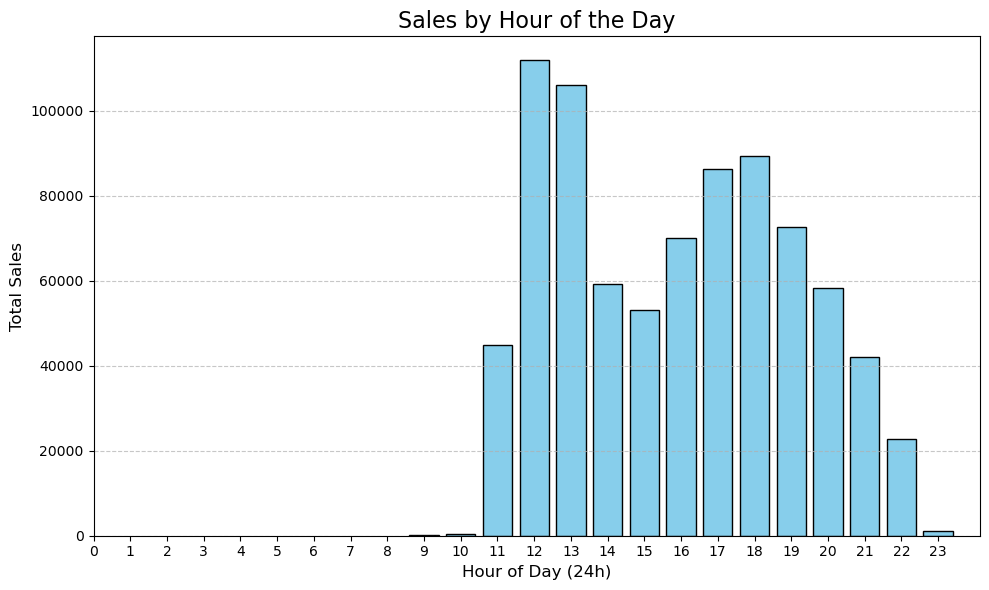

In [46]:
# Create a new figure and set the size
plt.figure(figsize=(10, 6)) 

# Create a bar plot using matplotlib
plt.bar(sales_by_hour["hour"], sales_by_hour["sales"], color="skyblue", edgecolor="black")

# Add a title and axis labels
plt.title("Sales by Hour of the Day", fontsize=16)
plt.xlabel("Hour of Day (24h)", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Show every hour
plt.xticks(range(0, 24))  

# Add horizontal gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout to prevent label cut-off
plt.tight_layout() 

plt.show()

- Taller bars = higher sales = peak hours.

### 7.	Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [47]:
# Extract day of the week
merged_df["day"] = merged_df["date"].dt.day_name()

merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,sales,hour,day
0,1,2015-01-01,1900-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday
1,2,2015-01-01,1900-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday
2,2,2015-01-01,1900-01-01 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday
3,2,2015-01-01,1900-01-01 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday
4,2,2015-01-01,1900-01-01 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday


In [141]:
# Group by day and sales
sales_by_day = merged_df.groupby("day")["sales"].sum().reset_index()

# Sort to find day of the week where sales are made the most
highest_sales_by_day = sales_by_day.sort_values(by="sales", ascending=False)

print(f"The day of the week where sales is made the most is on {highest_sales_by_day["day"][0]}s with {highest_sales_by_day["sales"][0]: .2f} sales.")

The day of the week where sales is made the most is on Fridays with  136073.90 sales.


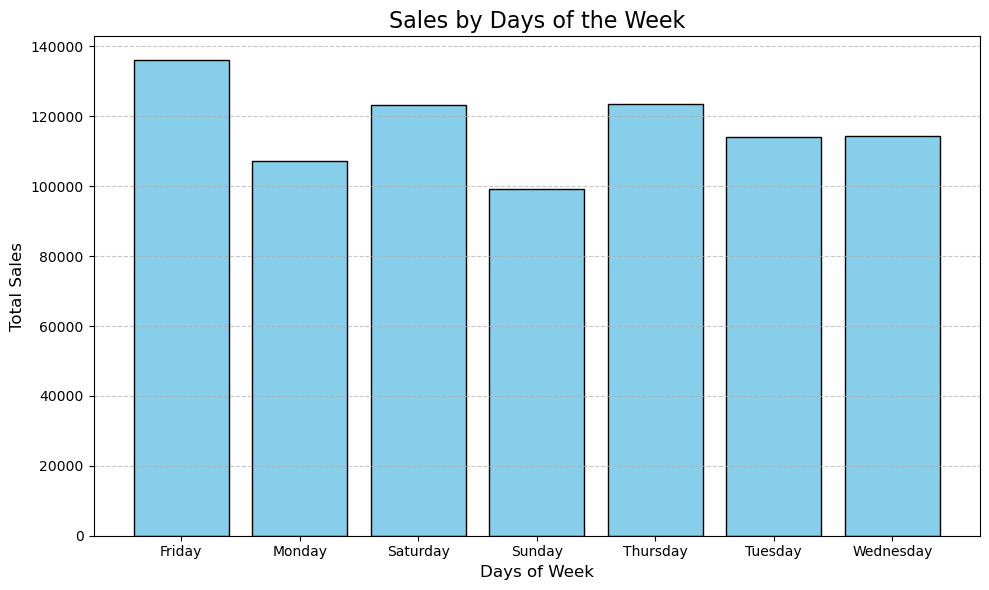

In [49]:
# Create a new figure and set the size
plt.figure(figsize=(10, 6)) 

# Create a bar plot using matplotlib
plt.bar(sales_by_day["day"], sales_by_day["sales"], color="skyblue", edgecolor="black")

# Add a title and axis labels
plt.title("Sales by Days of the Week", fontsize=16)
plt.xlabel("Days of Week", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Show every day
plt.xticks(range(0, 7))  

# Add horizontal gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout to prevent label cut-off
plt.tight_layout() 

plt.show()

### 8.	Find the top 5 best selling pizzas.

In [65]:
merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,sales,hour,day
0,1,2015-01-01,1900-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday
1,2,2015-01-01,1900-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday
2,2,2015-01-01,1900-01-01 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday
3,2,2015-01-01,1900-01-01 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday
4,2,2015-01-01,1900-01-01 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday


In [78]:
# Group by pizza name and sales
best_selling_pizza = merged_df.groupby("name")["sales"].sum().reset_index()

# Sort to find top best selling pizza
top_5_selling_pizza = best_selling_pizza.sort_values(by="sales", ascending=False)[:5]

print(f" The top 5 selling pizzas are")
print(top_5_selling_pizza)

 The top 5 selling pizzas are
                            name     sales
30        The Thai Chicken Pizza  43434.25
0     The Barbecue Chicken Pizza  42768.00
4   The California Chicken Pizza  41409.50
7       The Classic Deluxe Pizza  38180.50
26       The Spicy Italian Pizza  34831.25


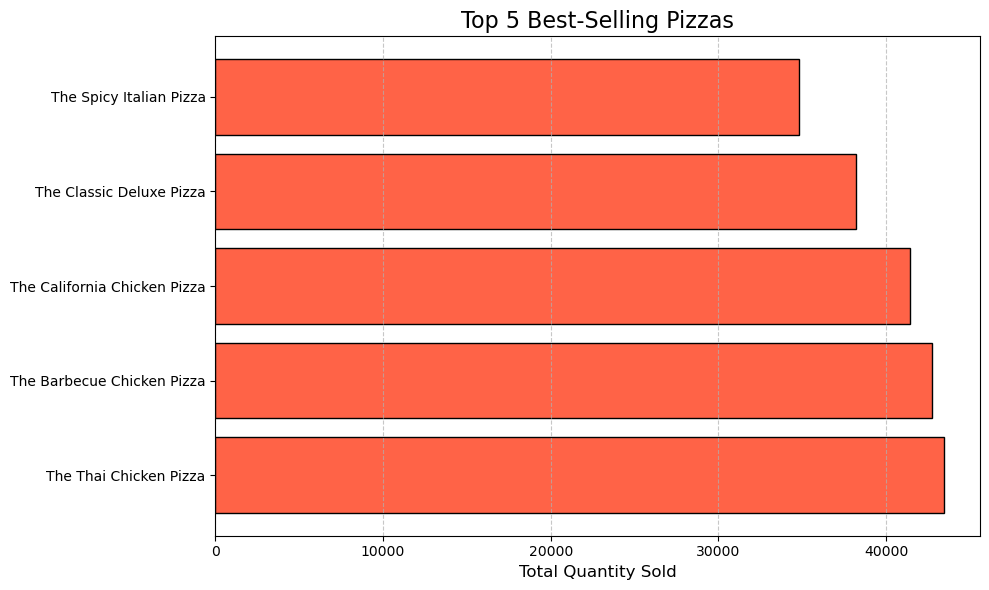

In [86]:
# Create the figure
plt.figure(figsize=(10, 6))

# Plot horizontal bar chart
plt.barh(top_5_selling_pizza["name"], top_5_selling_pizza["sales"], color="tomato", edgecolor="black")

# Add chart labels and title
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.title("Top 5 Best-Selling Pizzas", fontsize=16)

# Show grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)


# Tight layout for clean output
plt.tight_layout()

# Display the plot
plt.show()

### 9.	Find the sales made in each month. Any trend noticeable?

In [90]:
# Extract month
merged_df["month"] = merged_df["date"].dt.month_name()
merged_df["month_num"] = merged_df["date"].dt.month

merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,sales,hour,day,month,month_num
0,1,2015-01-01,1900-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January,1
1,2,2015-01-01,1900-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January,1
2,2,2015-01-01,1900-01-01 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January,1
3,2,2015-01-01,1900-01-01 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January,1
4,2,2015-01-01,1900-01-01 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January,1


In [96]:
# Group by month and month number to maintain calendar order
sales_by_month =   merged_df.groupby(["month_num", "month"])["sales"].sum().reset_index()

# Drop 'month_num' after maintain calendar order (for cleaner plot)
sales_by_month = sales_by_month[["month", "sales"]]

sales_by_month

,month,sales
0,January,69793.30
1,February,65159.60
2,March,70397.10
3,April,68736.80
4,May,71402.75
5,June,68230.20
6,July,72557.90
7,August,68278.25
8,September,64180.05
9,October,64027.60


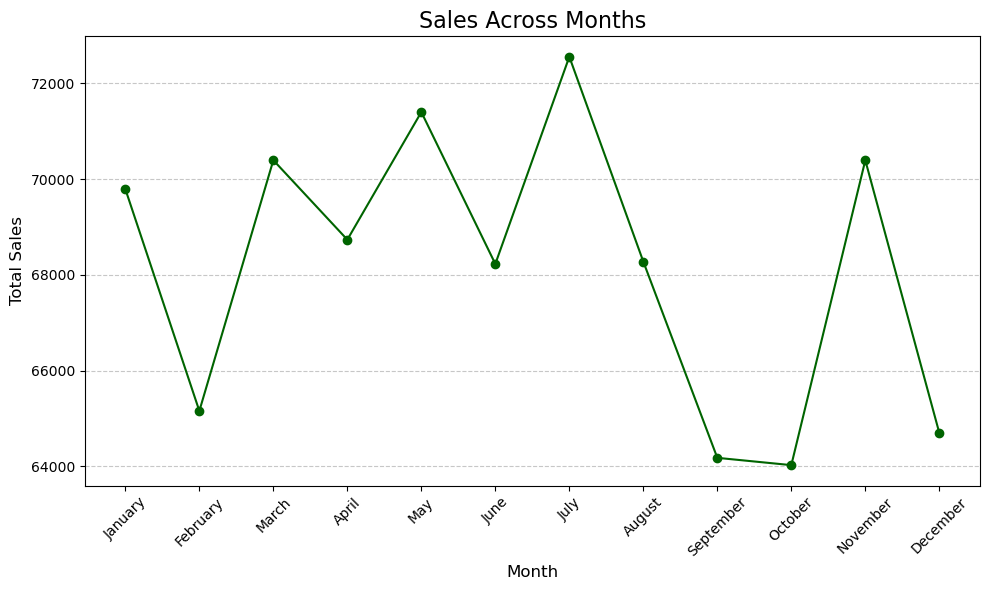

In [123]:
# Create the figure
plt.figure(figsize=(10, 6))

# Plot line plot
plt.plot(sales_by_month["month"], sales_by_month["sales"], marker="o", linestyle="-", color="darkgreen")

# Add chart labels and title
plt.title("Sales Across Months", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Rotate x-axis labels to fit
plt.xticks(rotation=45)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tight layout for clean output
plt.tight_layout()

# Display the plot
plt.show()

#### The notable trends are: 
- July has the highest sales, suggesting a strong peak mid-year - possibly due to school holidays, weather, or seasonal promotions.
- September and October show the lowest sales, indicating a potential slump during this period.
- February also experiences a dip, though not as sharp as September–October.
- November and March–May show strong performance, just below July.

### 10.	Are there pizza types that are not doing well on the menu?

In [111]:
# Group by pizza name and sales
sales_by_pizza = merged_df.groupby("name")["sales"].sum().reset_index()

# Sorting by sales
least_5_selling_pizza = sales_by_pizza.sort_values(by="sales", ascending=True)[:5]

print(f"The least 5 performing pizzas are:") 
print(f"{least_5_selling_pizza["name"][2]} with {least_5_selling_pizza["sales"][2]} sales")
print(f"{least_5_selling_pizza["name"][11]} with {least_5_selling_pizza["sales"][11]} sales")
print(f"{least_5_selling_pizza["name"][28]} with {least_5_selling_pizza["sales"][28]} sales")
print(f"{least_5_selling_pizza["name"][16]} with {least_5_selling_pizza["sales"][16]} sales")
print(f"{least_5_selling_pizza["name"][27]} with {least_5_selling_pizza["sales"][27]} sales")

The least 5 performing pizzas are:
The Brie Carre Pizza with 11588.5 sales
The Green Garden Pizza with 13955.75 sales
The Spinach Supreme Pizza with 15277.75 sales
The Mediterranean Pizza with 15360.5 sales
The Spinach Pesto Pizza with 15596.0 sales


### 11. Most preferred pizza size?

In [114]:
merged_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,sales,hour,day,month,month_num,year
0,1,2015-01-01,1900-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January,1,2015
1,2,2015-01-01,1900-01-01 11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January,1,2015
2,2,2015-01-01,1900-01-01 11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January,1,2015
3,2,2015-01-01,1900-01-01 11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January,1,2015
4,2,2015-01-01,1900-01-01 11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January,1,2015


In [125]:
merged_df["size"].value_counts()

size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [130]:
# sales by pizza size
pizza_size_sales = merged_df.groupby("size")["sales"].sum().reset_index()

# Sorting by sales
pizza_size_sales = pizza_size_sales.sort_values("sales", ascending=False)

pizza_size_sales

,size,sales
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


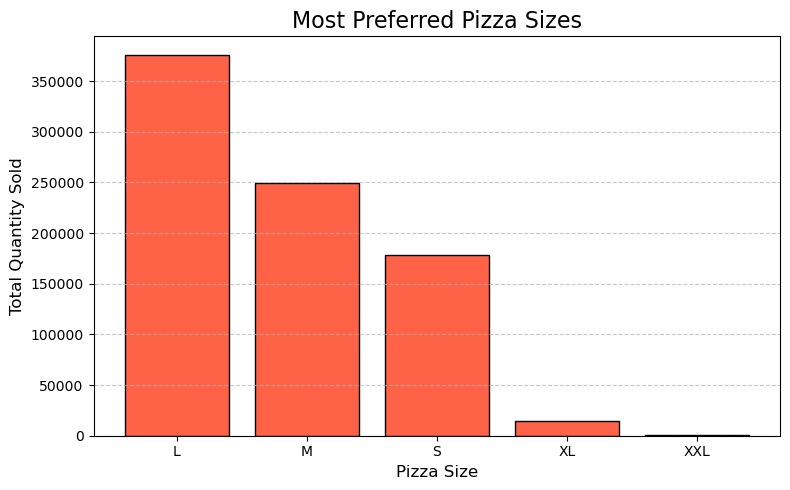

In [133]:
# Create the figure
plt.figure(figsize=(8, 5))

# Plot bar chart
plt.bar(pizza_size_sales["size"], pizza_size_sales["sales"], color="tomato", edgecolor="black")

# Add chart labels and title
plt.title("Most Preferred Pizza Sizes", fontsize=16)
plt.xlabel("Pizza Size", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tight layout for clean output
plt.tight_layout()

# Display the plot
plt.show()

In [139]:
print(f"The most preferred Pizza sizes are {pizza_size_sales["size"][0]} (Large) and {pizza_size_sales["size"][1]} (Medium) respectively.")

The most preferred Pizza sizes are L (Large) and M (Medium) respectively.
